In [1]:
# Setting up MNST, this should look familiar:
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import LeakyReLU
from keras.layers import Dense, Dropout
import time # speed of optimizers

mnist_num_classes = 10 
mnist_image_size = 784

(mnist_training_images, mnist_training_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
mnist_training_data = mnist_training_images.reshape(mnist_training_images.shape[0], mnist_image_size) 
mnist_test_data = mnist_test_images.reshape(mnist_test_images.shape[0], mnist_image_size)

mnist_training_labels = to_categorical(mnist_training_labels, mnist_num_classes)
mnist_test_labels = to_categorical(mnist_test_labels, mnist_num_classes)

Using TensorFlow backend.


In [2]:
def plot_training_history(history, model, name, time):
    figure = plt.figure()
    figure.suptitle(name)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(mnist_test_data, mnist_test_labels, verbose=False)
    print(f'Trained in {time} seconds')
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [3]:
def nick_model_ReLU_v4():
    model_ReLU_drop2 = Sequential()
    model_ReLU_drop2.add(Dense(units=256, input_shape=(mnist_image_size,)))
    model_ReLU_drop2.add(LeakyReLU(alpha=.01))
    model_ReLU_drop2.add(Dense(units=128))
    model_ReLU_drop2.add(LeakyReLU(alpha=.01))
    model_ReLU_drop2.add(Dense(units=64))
    model_ReLU_drop2.add(LeakyReLU(alpha=.01))
    model_ReLU_drop2.add(Dropout(rate=0.1))
    model_ReLU_drop2.add(Dense(units=64))
    model_ReLU_drop2.add(LeakyReLU(alpha=.01))
    model_ReLU_drop2.add(Dropout(rate=0.1))
    model_ReLU_drop2.add(Dense(units=32))
    model_ReLU_drop2.add(LeakyReLU(alpha=.01))
    model_ReLU_drop2.add(Dropout(rate=0.1))
    model_ReLU_drop2.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model_ReLU_drop2





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


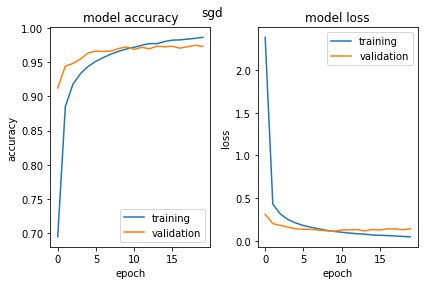

Trained in 83.70951304500001 seconds
Test loss: 0.161
Test accuracy: 0.968


In [4]:
name = "sgd"
model = nick_model_ReLU_v4()
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.process_time()
history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
stop = time.process_time()
plot_training_history(history, model, name, stop - start)

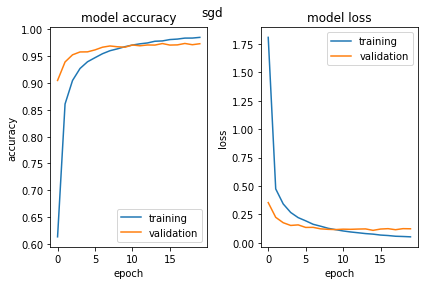

Trained in 83.89039969 seconds
Test loss: 0.139
Test accuracy: 0.969


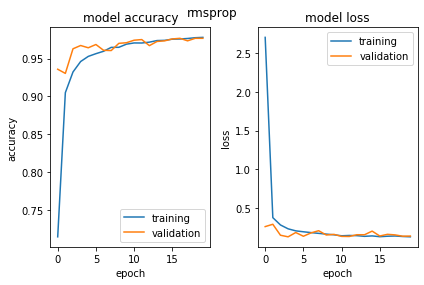

Trained in 98.67004140399999 seconds
Test loss: 0.166
Test accuracy: 0.976


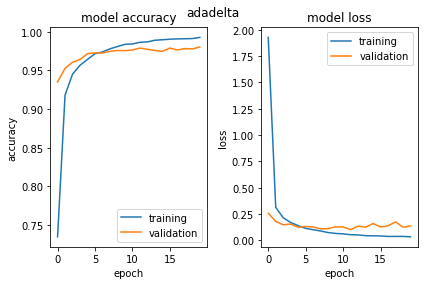

Trained in 133.16412487600002 seconds
Test loss: 0.148
Test accuracy: 0.979


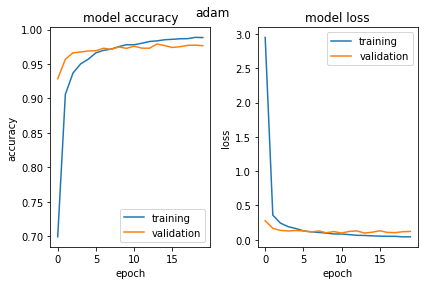

Trained in 123.18995778499999 seconds
Test loss: 0.122
Test accuracy: 0.975


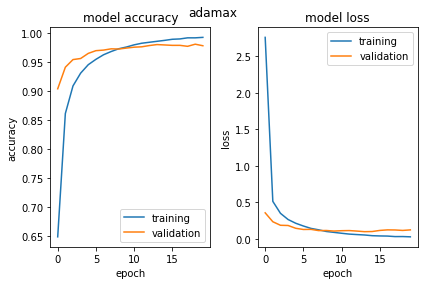

Trained in 118.939445664 seconds
Test loss: 0.139
Test accuracy: 0.974


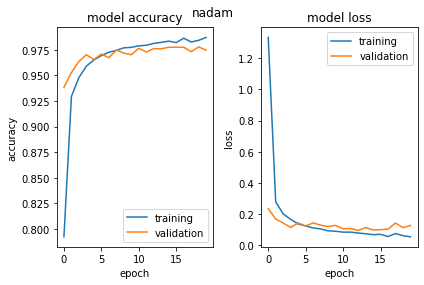

Trained in 133.81651391999992 seconds
Test loss: 0.129
Test accuracy: 0.976


In [5]:
optimizers = [
    'sgd',
    'rmsprop',
    'adadelta',
    'adam',
    'adamax',
    'nadam'
]

# So we can plot them on one chart
histories = []

for optimizer in optimizers:
    model = nick_model_ReLU_v4()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    start = time.process_time()
    history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
    stop = time.process_time()
    plot_training_history(history, model, optimizer, stop - start)
    histories.append(history)

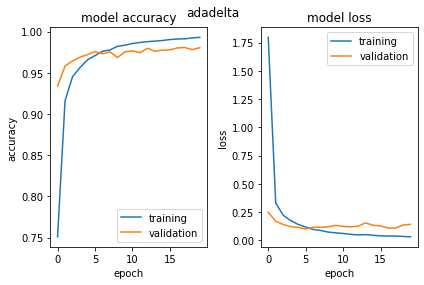

Trained in 130.82285260700002 seconds
Test loss: 0.159
Test accuracy: 0.979


In [5]:
name = "adadelta"
model = nick_model_ReLU_v4()
model.compile(optimizer="adadelta", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.process_time()
history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
stop = time.process_time()
plot_training_history(history, model, name, stop - start)